# MNIST Digit Recognizer

This competition is hosted on [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and the data are stored [locally](C:\Users\DMacKellar\Documents\Python\Kaggle\Digit\train.csv)

This is my first foray into applying what I've learned in data science with a hands-on goal of predicting hand-written digits from the MNIST data set.  As a classical classification problem, I think that using decision trees/random forests is a decent primary approach, although I am interested in exploring this data set with other tools, which I'll carry out later in other notebooks.

Please feel free to fork/comment/upbraid, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import clock

Load in the test and train data sets with pandas

In [2]:
%%time

# on the PC:
# train = pd.read_csv('C:\\Users\\DMacKellar\\Documents\\Python\\Kaggle\\Digit\\train.csv')

# test = pd.read_csv('C:\\Users\\DMacKellar\\Documents\\Python\\Kaggle\\Digit\\test.csv')

# on the Mac:
train = pd.read_csv('/Users/drew/Documents/Data/R/Kaggle_Digit_Recognizer/train.csv')

test = pd.read_csv('/Users/drew/Documents/Data/R/Kaggle_Digit_Recognizer/test.csv')

CPU times: user 11 s, sys: 1.63 s, total: 12.6 s
Wall time: 14.4 s


And check the format of both:

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I'll also want to take a look at the data represented as images, using PyPlot's imshow:

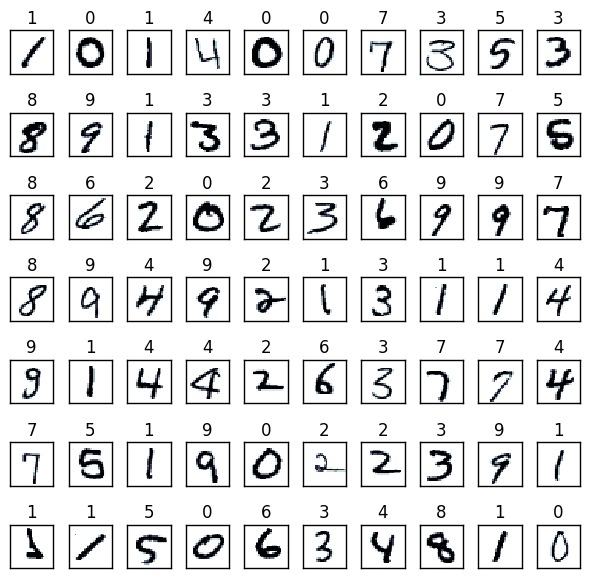

In [5]:
# plot some of the numbers
plt.figure(figsize=(6, 6))
for digit in range(0,70):
    plt.subplot(7,10,digit+1)
    grid_data = train.iloc[digit,1:].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r", label=train.iloc[digit,0])
    title = train.iloc[digit,0]
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

These data look pretty variable (especially the first numeral of the bottom row: that's a one?); a more complicated approach like a neural net might be necessary, but I'll stick with a random forest to start.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
train_labels = train.iloc[:,0]
train_pixels = train.iloc[:,1:]

Now, this is essentially my first time using scikit-learn's Random Forest Classifier, and I don't yet know how all of the parameters will affect the outcome ([docs here](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).  I'll probably have to play with n_estimators and n_features a bit.

In [20]:
print(np.round(np.logspace(0.1, 2.7, num=10)))
print(np.sqrt(785))
print(train.shape)

[   1.    2.    5.    9.   18.   35.   68.  133.  258.  501.]
28.0178514522
(42000, 785)


Following [Samuel Flender's example](https://www.kaggle.com/sflender/digit-recognizer/comparing-random-forest-pca-and-knn), I'm going to try further splitting the train data to offer a means of evaluating different parameter sets and output models from sklearn.  

In fact, I've basically just copied his code below for setting up a loop to split the training data set into smaller subsets, iterate through calls to RandomForestClassifier with different values for the number of estimators, then evaluate each output decision tree's accuracy classifying other subsets of values from the training data set.

In [7]:
from sklearn.model_selection import train_test_split

def evaluate_classifier(clf, data, target, split_ratio):
    # train_test_split returns: splitting : list, length=2 * len(arrays)
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)   # this is the actual call to build the decision trees; where most of the comp time comes in
    return clf.score(testX,testY)   # outputs score only (freq pred for testX matches label testY); doesn't keep the trees

In [8]:
%%time
# set up a broad range of estimators to try
n_est = np.round(np.logspace(0.1, 2.7, num=10)).tolist()
n_estimators_array = []
for i in n_est:
    n_estimators_array.append(int(i))
# set up a broad range of features to try
# rf_1 = RandomForestClassifier(n_estimators=200)
# rf_2 = rf_1.fit(train_pixels, train_labels)
print(n_estimators_array)

[1, 2, 5, 9, 18, 35, 68, 133, 258, 501]
CPU times: user 215 µs, sys: 17 µs, total: 232 µs
Wall time: 238 µs


In [9]:
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu = np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
timer = clock()
for n_estimators in n_estimators_array:
    # taking 10 samples for each forest, to return average and stdev of accuracy scores
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=-1, criterion="gini")
        # split_ratio=0.8 means 80/20 split in train/test for each classifier
        # only using 1,000 samples to build trees
        score_array[i] = evaluate_classifier(clf, train_pixels.iloc[0:1000], train_labels.iloc[0:1000], 0.8)
    print('Number of estimators: ', n_estimators, '\tTime taken: ', round(clock() - timer, 3), ' seconds')
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1
    timer = clock()
    

Number of estimators:  1 	Time taken:  0.317  seconds
Number of estimators:  2 	Time taken:  0.439  seconds
Number of estimators:  5 	Time taken:  0.68  seconds
Number of estimators:  9 	Time taken:  0.993  seconds
Number of estimators:  18 	Time taken:  1.738  seconds
Number of estimators:  35 	Time taken:  3.136  seconds
Number of estimators:  68 	Time taken:  5.954  seconds
Number of estimators:  133 	Time taken:  11.3  seconds
Number of estimators:  258 	Time taken:  21.955  seconds
Number of estimators:  501 	Time taken:  41.528  seconds


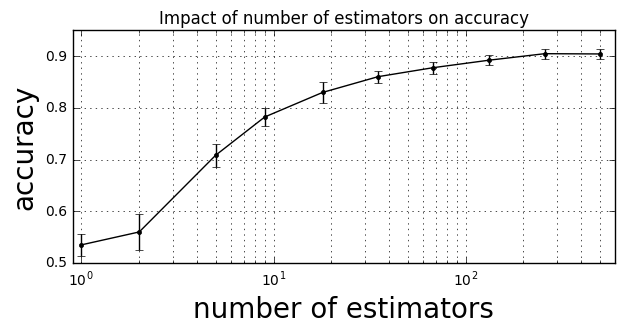

In [10]:
# it looks like the performance saturates around 50-100 estimators

plt.figure(figsize=(7,3))
plt.errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 20)
plt.ylabel("accuracy",size = 20)
plt.xlim(0.9,600)
plt.ylim(0.5, 0.95)
plt.grid(which="both")
plt.title('Impact of number of estimators on accuracy')
plt.show()

So around 100 estimators is approaching saturation, getting close to 90% accuracy.  I wonder if the number of features would affect the outcome.  The default is "auto", which takes the square root of the number of features (sqrt(785)~28).

In [11]:
n_feat = np.round(np.logspace(0.1, 2.7, num=10)).tolist()
n_features_array = []
for i in n_est:
    n_features_array.append(int(i))
n_features_array.append(784)
print(n_features_array)

[1, 2, 5, 9, 18, 35, 68, 133, 258, 501, 784]


In [12]:
n_samples = 10
n_grid = len(n_features_array)
score_array_mu2 = np.zeros(n_grid)
score_array_sigma2 = np.zeros(n_grid)
j=0
timer = clock()
for n_features in n_features_array:
    # taking 10 samples for each forest, to return average and stdev of accuracy scores
    score_array=np.zeros(n_samples)
    for i in range(0, n_samples):
        clf = RandomForestClassifier(n_estimators=100, max_features=n_features, n_jobs=1, criterion="gini")
        # split_ratio=0.8 means 80/20 split in train/test for each classifier
        # only using 1,000 samples to build trees
        score_array[i] = evaluate_classifier(clf, train_pixels.iloc[0:1000], train_labels.iloc[0:1000], 0.8)
    print('Number of features: ', n_features, '\tTime taken: ', round(clock() - timer, 3), ' seconds')
    score_array_mu2[j], score_array_sigma2[j] = np.mean(score_array), np.std(score_array)
    j=j+1
    timer = clock()

Number of features:  1 	Time taken:  4.216  seconds
Number of features:  2 	Time taken:  4.346  seconds
Number of features:  5 	Time taken:  4.956  seconds
Number of features:  9 	Time taken:  5.244  seconds
Number of features:  18 	Time taken:  6.948  seconds
Number of features:  35 	Time taken:  9.242  seconds
Number of features:  68 	Time taken:  13.569  seconds
Number of features:  133 	Time taken:  21.506  seconds
Number of features:  258 	Time taken:  36.087  seconds
Number of features:  501 	Time taken:  61.929  seconds
Number of features:  784 	Time taken:  91.768  seconds


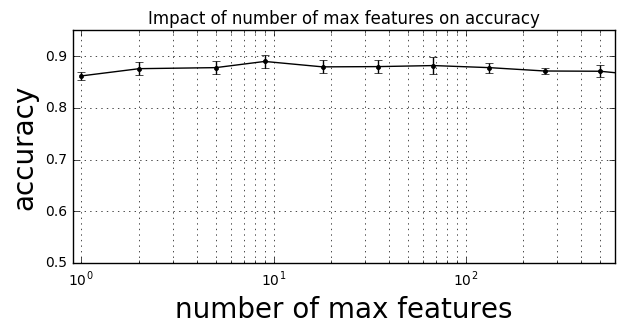

In [13]:
# it looks like the performance saturates around 50-100 estimators

plt.figure(figsize=(7,3))
plt.errorbar(n_features_array, score_array_mu2, yerr=score_array_sigma2, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of max features",size = 20)
plt.ylabel("accuracy",size = 20)
plt.xlim(0.9,600)
plt.ylim(0.5, 0.95)
plt.grid(which="both")
plt.title('Impact of number of max features on accuracy')
plt.show()

In [14]:
print('Average for %s features: ' % n_features_array[4], score_array_mu2[4], '\tStdev for 18 features: ', score_array_sigma2[4])
print('Average for %s features: ' % n_features_array[5], score_array_mu2[5], '\tStdev for 35 features: ', score_array_sigma2[5])

Average for 18 features:  0.8795 	Stdev for 18 features:  0.0123389626793
Average for 35 features:  0.88 	Stdev for 35 features:  0.0120415945788


So, not a big impact on accuracy.  If anything, there's a slight improvement with fewer than sqrt(features); best accuracy around 18 features.  I could probably try playing with other parameters, but let's try a larger training set next.

In [16]:
%%time
clf = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=None, n_jobs=1, criterion="gini")
trainX1, testX1, trainY1, testY1 = train_test_split(train_pixels, train_labels, train_size=0.8, random_state=0)
clf1 = clf.fit(trainX1, trainY1)
print(clf1.score(testX1,testY1))

0.963095238095
CPU times: user 27.6 s, sys: 755 ms, total: 28.4 s
Wall time: 29.4 s


Not bad; I eked out another 6% accuracy with a larger dataset.  As of 20170226, there are about 1400 entries for this competition in Kaggle, and this accuracy score would land at around 1,038.  That's probably about as good as you could expect for this kind of classifier; I think I'll try neural networks next.

But first, to retrain with the entire training data set, and prepare the predictions on the test data for submission to Kaggle:

In [17]:
%%time

clf2 = clf.fit(train_pixels, train_labels)

CPU times: user 35.1 s, sys: 615 ms, total: 35.7 s
Wall time: 39.6 s


In [18]:
results=clf2.predict(test)

test['Label'] = pd.Series(results)
test['ImageId'] = test.index +1
sub = test[['ImageId','Label']]

sub.to_csv('digit_forest_submission.csv', index=False)

Just to check the first 30 digits and predictions output:

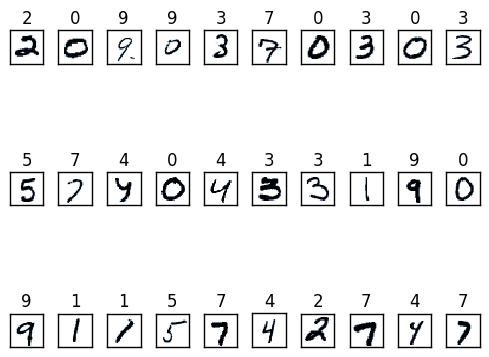

In [32]:
# plot some of the numbers
plt.figure(figsize=(5, 5))
for digit in range(0,30):
    plt.subplot(3,10,digit+1)
    grid_data = test.iloc[digit,:-2].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r", label=train.iloc[digit,0])
    title = test.iloc[digit,-2]
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

Looks like it's formatted correctly, and I agree with most of the calls (except the fourth, but hey, nobody's perfect).